In [1]:
# Spectral plot
import sys
sys.path.insert(0,"..")

import speasy as spz
import matplotlib.pyplot as plt
import numpy as np
import speasy_utils

# plotting
import matplotlib
import matplotlib.colors as colors
import matplotlib.ticker as mticker
from datetime import datetime

Get some data. 

In [2]:
param_id = "pas_l2_omni"
start = "2020/07/14T10:00:00"
stop = "2020/07/15T06:00:00"

In [3]:
# get data, see what shape it has
p = spz.get_data(f"amda/{param_id}", start, stop)
print(p)
indx= spz.inventory.data_tree.amda.Parameters.ACE.MFI.ace_imf_all.imf

In [4]:
p1 = spz.get_data(indx, start, stop)
print(p1)

The plotting function `spectro_plot`. Can be found in the `speasy_utils.plot` module.

In [5]:
def spectro_plot(param_id, start, stop, xlabel=None, ylabel=None, 
                 zlabel=None, yscale=None,
                 channels = None, ax=None, figsize=(10,2), 
                 vmin=None, vmax=None, lognorm=True, datefmt="%H:%M",
                 cmap=None):
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=figsize)
    # get the data
    param_data = spz.get_data(param_id, start, stop)
    [n,m] = param_data.data.shape
    X = param_data.data 
    
    # channels (constant channels case)
    if channels is None:
        y = np.arange(0,m,1)
    else:
        y = channels
    
    # grid
    x1, y1 = np.meshgrid(param_data.time,y, indexing="ij")
    
    # data bounds
    if vmin is None:
        vmin = np.nanmin(X)
    if vmax is None:
        vmax = np.nanmax(X)
    
    # colormap
    if not cmap:
        cmap = matplotlib.cm.rainbow.copy()
        cmap.set_bad('White',0.)
    
    # normalize colormapping
    if lognorm and vmin>0.:
        norm=colors.LogNorm(vmin=vmin, vmax=vmax)
    else:
        norm=None
    
    
    c = ax.pcolormesh(x1, y1, X, cmap=cmap, norm=norm, edgecolors="face")
    cbar = plt.colorbar(c,ax=ax, norm=norm)
    if zlabel:
        cbar.set_label(zlabel)
    
    if xlabel:
        ax.set_xlabel(xlabel)
    x_ticks = ax.get_xticks()
    x_ticks = [datetime.utcfromtimestamp(xi) for xi in x_ticks]
    x_labels = [d.strftime(datefmt) for d in x_ticks]
    
    ticks_loc = ax.get_xticks().tolist()
    ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    ax.set_xticklabels(x_labels)
    
    if ylabel:
        ax.set_ylabel(ylabel)
    
    ax.set_ylim(y.min(), y.max())
    
    if yscale:
        ax.set_yscale(yscale)
    
    return ax
    


## Themis B data
Lets try to reproduce the following AMDA plot of Themis B's ion energy flux data on May 16 2008 between 5AM and 3PM.

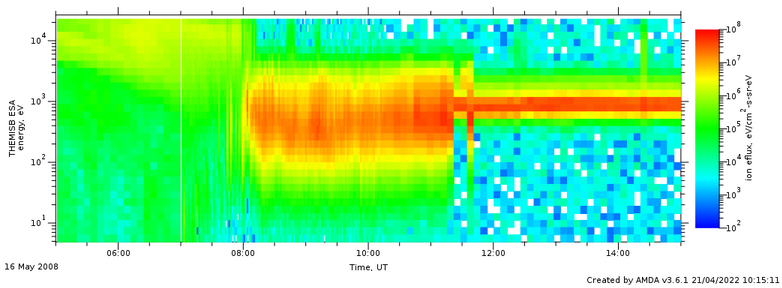

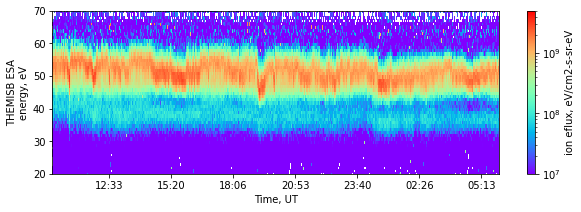

In [20]:
# Energy channel bins
#ybin_min = np.array([22680,18275,13883,10546,8012,6086,4624,3512,
#                    2668,2027,1540,1170,888,675,512,390,296,225,
#                    170,130,98.9,75.2,57.,43.3,33.,25.1,18.9,
#                    14.2,11.,8.44,6.38,4.88])
ybin_max = np.hstack((np.array([26501]), ybin_min[:-1]))
ybins = np.vstack((ybin_min, ybin_max)).T
channels = None #np.mean(ybins, axis=1)


from speasy_utils.plot import spectro_plot
ax = spectro_plot("amda/pas_l2_omni", start, stop, 
                  #channels=channels, 
                  xlabel="Time, UT",
                  ylabel="THEMISB ESA\nenergy, eV", 
                  zlabel="ion eflux, eV/cm2-s-sr-eV",
                  #yscale="log",
                  figsize=(10,3),
                  vmin=1e7, vmax=5e9,
                  lognorm=True,
                 )
plt.ylim([20,70])
plt.show()

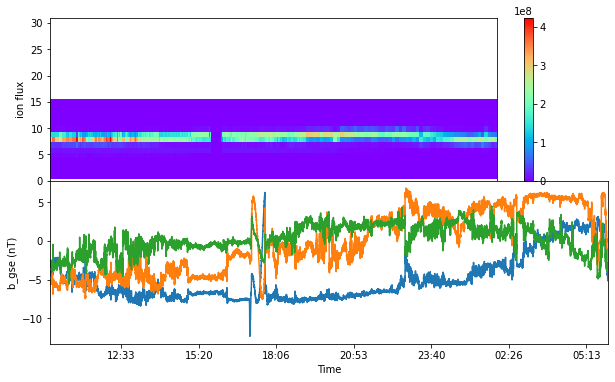

In [7]:
from speasy_utils.plot import parameter_plot

parameter_plot(["amda/thb_ion_sp", "amda/thb_bs"], start, stop, 
              ylabel=["ion flux", "b_gse (nT)"], xlabel="Time")
plt.show()